In [1]:
from IPython.display import display, Math, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Aufgabe 4.2 PCA Siebenkampf
Wir analysieren Daten zum $\textbf{Siebenkampf}$ aus den Olympischen Spielen und Weltmeisterschaften der Jahre 1984 bis 2013.

In [2]:
path="/Users/julia/Desktop/Lehre/2025_WiSe/Multivariate_Analysemethoden/2024_SoSe_Unterlagen/data"

#### 0 Importieren des Datensatzes

In [3]:
sieben=pd.read_csv(path+"/siebenkampf.csv",sep=";",index_col=0)

In [4]:
disziplinen = ["Hochsprung", "Weitsprung", 
               "Zeit_100m_Huerden", "Zeit_200m_Lauf", "Zeit_800m_Lauf_Sekunden", 
               "Kugelstoßen", "Speerwurf"]
sieben_dis = sieben[disziplinen]

#### 1 Datenaufbereitung und Standardisierung

In [5]:
# Wie in Aufgabe 3.8: String -> Float
sieben_dis_numeric=sieben_dis.copy()
for column in sieben_dis.columns:
    sieben_dis_numeric[column]=sieben_dis[column].str.replace(',','.').astype(float)

In [6]:
# Wir filtern die in Aufgabe 3.8 entdeckten Ausreißer (Datenfehler), da diese die PCA verzerren würden
sieben_dis_numeric1 = sieben_dis_numeric[(sieben_dis_numeric["Hochsprung"] != 0) & 
                         (sieben_dis_numeric["Zeit_100m_Huerden"] <= 15) & 
                         (sieben_dis_numeric["Zeit_200m_Lauf"] <= 30)]

In [7]:
# Variablen umdrehen, sodass die Richtung immer gleich ist 
# größer ist besser: "Hochsprung", "Weitsprung", "Kugelstoßen", "Speerwurf"
# kleiner ist besser: "Zeit_100m_Huerden", "Zeit_200m_Lauf", "Zeit_800m_Lauf_Sekunden" 
    ## -> die Variablen umdrehen, sodass größer immer besser ist
sieben_dis_numeric2=sieben_dis_numeric1.copy()
sieben_dis_numeric2["Zeit_100m_Huerden"] = sieben_dis_numeric1["Zeit_100m_Huerden"].max() - sieben_dis_numeric1["Zeit_100m_Huerden"]
sieben_dis_numeric2["Zeit_200m_Lauf"] = sieben_dis_numeric1["Zeit_200m_Lauf"].max() - sieben_dis_numeric1["Zeit_200m_Lauf"]
sieben_dis_numeric2["Zeit_800m_Lauf_Sekunden"] = sieben_dis_numeric1["Zeit_800m_Lauf_Sekunden"].max() - sieben_dis_numeric1["Zeit_800m_Lauf_Sekunden"]

print(sieben_dis_numeric2.describe())

       Hochsprung  Weitsprung  Zeit_100m_Huerden  Zeit_200m_Lauf  \
count  207.000000  207.000000         207.000000      207.000000   
mean     1.812048    6.312464           1.318406        1.728261   
std      0.056676    0.281963           0.360864        0.674426   
min      1.600000    5.350000           0.000000        0.000000   
25%      1.780000    6.125000           1.120000        1.270000   
50%      1.810000    6.310000           1.320000        1.770000   
75%      1.840000    6.485000           1.535000        2.120000   
max      1.950000    7.270000           2.300000        3.480000   

       Zeit_800m_Lauf_Sekunden  Kugelstoßen   Speerwurf  
count               207.000000   207.000000  207.000000  
mean                 14.895990    14.094251   44.725266  
std                   4.305604     1.125856    4.877911  
min                   0.000000    11.430000   31.900000  
25%                  11.840000    13.315000   41.855000  
50%                  15.090000    14.07

In [8]:
# Wir standardisieren die Daten, um die Werteskalen der Variablen anzugleichen
sieben_dis_numeric2_stand = sieben_dis_numeric2.copy()
sieben_dis_numeric2_stand[disziplinen] = StandardScaler().fit_transform(sieben_dis_numeric2[disziplinen])

#sieben_dis_numeric2_stand.to_csv("../data/sieben_groesser_besser.csv", sep=';', index=False)

In [9]:
sieben_dis_numeric2_stand.describe()

,Hochsprung,Weitsprung,Zeit_100m_Huerden,Zeit_200m_Lauf,Zeit_800m_Lauf_Sekunden,Kugelstoßen,Speerwurf
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02
mean,-4.846365e-15,1.267371e-15,3.432574e-17,-2.145359e-16,1.716287e-17,-4.462346e-16,-1.587565e-15
std,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00,1.002424e+00
min,-3.750481e+00,-3.421715e+00,-3.662322e+00,-2.568778e+00,-3.468062e+00,-2.372159e+00,-2.635628e+00
25%,-5.668358e-01,-6.664642e-01,-5.511398e-01,-6.811301e-01,-7.114910e-01,-6.938190e-01,-5.898475e-01
50%,-3.622827e-02,-8.759096e-03,4.428443e-03,6.203841e-02,4.516903e-02,-2.159246e-02,-4.218267e-02
75%,4.943792e-01,6.133944e-01,6.016643e-01,5.822564e-01,6.842557e-01,5.526938e-01,6.349489e-01
max,2.439940e+00,3.404197e+00,2.726713e+00,2.603675e+00,2.245304e+00,2.863194e+00,2.388915e+00


#### 2 Kovarianz und Korrelation

                         Hochsprung  Weitsprung  Zeit_100m_Huerden  \
Hochsprung                 1.004854    0.305351           0.038231   
Weitsprung                 0.305351    1.004854           0.448711   
Zeit_100m_Huerden          0.038231    0.448711           1.004854   
Zeit_200m_Lauf             0.074986    0.463562           0.610120   
Zeit_800m_Lauf_Sekunden   -0.013422    0.103246           0.253790   
Kugelstoßen               -0.089287   -0.003836          -0.113332   
Speerwurf                  0.040232   -0.150356          -0.108894   

                         Zeit_200m_Lauf  Zeit_800m_Lauf_Sekunden  Kugelstoßen  \
Hochsprung                     0.074986                -0.013422    -0.089287   
Weitsprung                     0.463562                 0.103246    -0.003836   
Zeit_100m_Huerden              0.610120                 0.253790    -0.113332   
Zeit_200m_Lauf                 1.004854                 0.413336    -0.121984   
Zeit_800m_Lauf_Sekunden        0.4

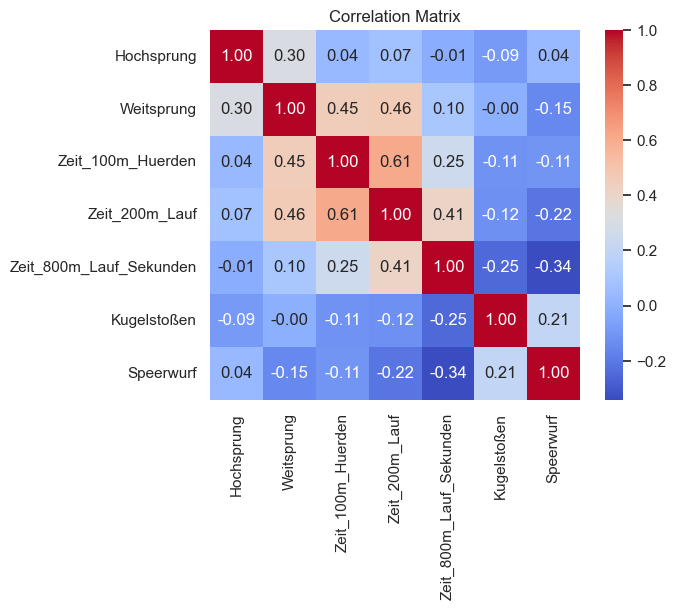

In [10]:
# Kovarianz- und Korrelationsmatrix
cov_matrix = sieben_dis_numeric2_stand.cov()
cor_matrix = sieben_dis_numeric2_stand.corr()

# Kovarianz- und Korrelationsmatrix sind identisch für standardisierte Daten
print(cov_matrix)
print(cor_matrix)

# Plot der Korrelationsmatrix
sns.set(style="white")
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

#### 3 Hauptkomponentenanalyse (PCA)

In [16]:
# Berechne PCA mit skalierten Variablen
pca = PCA()
pca_stand = pca.fit(sieben_dis_numeric2_stand)

In [17]:
# Ausgabe der Hauptkomponenten
print("Principal Components:\n", pca.components_)

Principal Components:
 [[ 0.13648103  0.42488273  0.48527652  0.5379817   0.38612026 -0.20849385
  -0.28874113]
 [ 0.43198185  0.44575895  0.19151939  0.08414209 -0.43399729  0.41441859
   0.45916736]
 [ 0.74048353  0.0633098  -0.29793202 -0.23194134 -0.0104077  -0.54052296
  -0.11332408]
 [-0.12463978 -0.24475142  0.30931205  0.1134246  -0.01254883 -0.56592977
   0.70398054]
 [ 0.32738086 -0.27442028 -0.1834859   0.11944831  0.71221848  0.38067715
   0.3426515 ]
 [-0.35150125  0.68223817 -0.46355534 -0.13514989  0.27331444 -0.15263252
   0.28257995]
 [-0.0135028  -0.12691263 -0.54299075  0.77736766 -0.28343564 -0.06429768
   0.01007297]]


In [18]:
# Ausgabe der ersten drei Hauptkomponenten
# Output first three principal components
print("First three principal components:\n", np.round(pca.components_[:3,], 2))

First three principal components:
 [[ 0.14  0.42  0.49  0.54  0.39 -0.21 -0.29]
 [ 0.43  0.45  0.19  0.08 -0.43  0.41  0.46]
 [ 0.74  0.06 -0.3  -0.23 -0.01 -0.54 -0.11]]


In [19]:
# Ausgabe der Loadings per Disziplin 
pd.DataFrame(pca.components_.T, index=disziplinen, columns=[f'PC{i+1}' for i in range(pca.components_.T.shape[0])])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Hochsprung,0.136481,0.431982,0.740484,-0.124640,0.327381,-0.351501,-0.013503
Weitsprung,0.424883,0.445759,0.063310,-0.244751,-0.274420,0.682238,-0.126913
Zeit_100m_Huerden,0.485277,0.191519,-0.297932,0.309312,-0.183486,-0.463555,-0.542991
Zeit_200m_Lauf,0.537982,0.084142,-0.231941,0.113425,0.119448,-0.135150,0.777368
Zeit_800m_Lauf_Sekunden,0.386120,-0.433997,-0.010408,-0.012549,0.712218,0.273314,-0.283436
Kugelstoßen,-0.208494,0.414419,-0.540523,-0.565930,0.380677,-0.152633,-0.064298
Speerwurf,-0.288741,0.459167,-0.113324,0.703981,0.342652,0.282580,0.010073


Interpretation der ersten drei Hauptkomponenten:
* PC1: Schnelligkeit
    * ++ Zeit_200m_Lauf, Zeit_100m_Huerden, (Weitsprung), (800m Lauf) v.s.
    * -- Kugelstoßen und Speerwurf
* PC2: Kraft (nicht Ausdauer)
    *  ++ Speerwurf, Weitsprung, Hochsprung, Kugelstoßen
    *  -- 800m Lauf
* PC3: Hochsprung v.s. Rest (insbesondere v.s. Kugelstoßen)

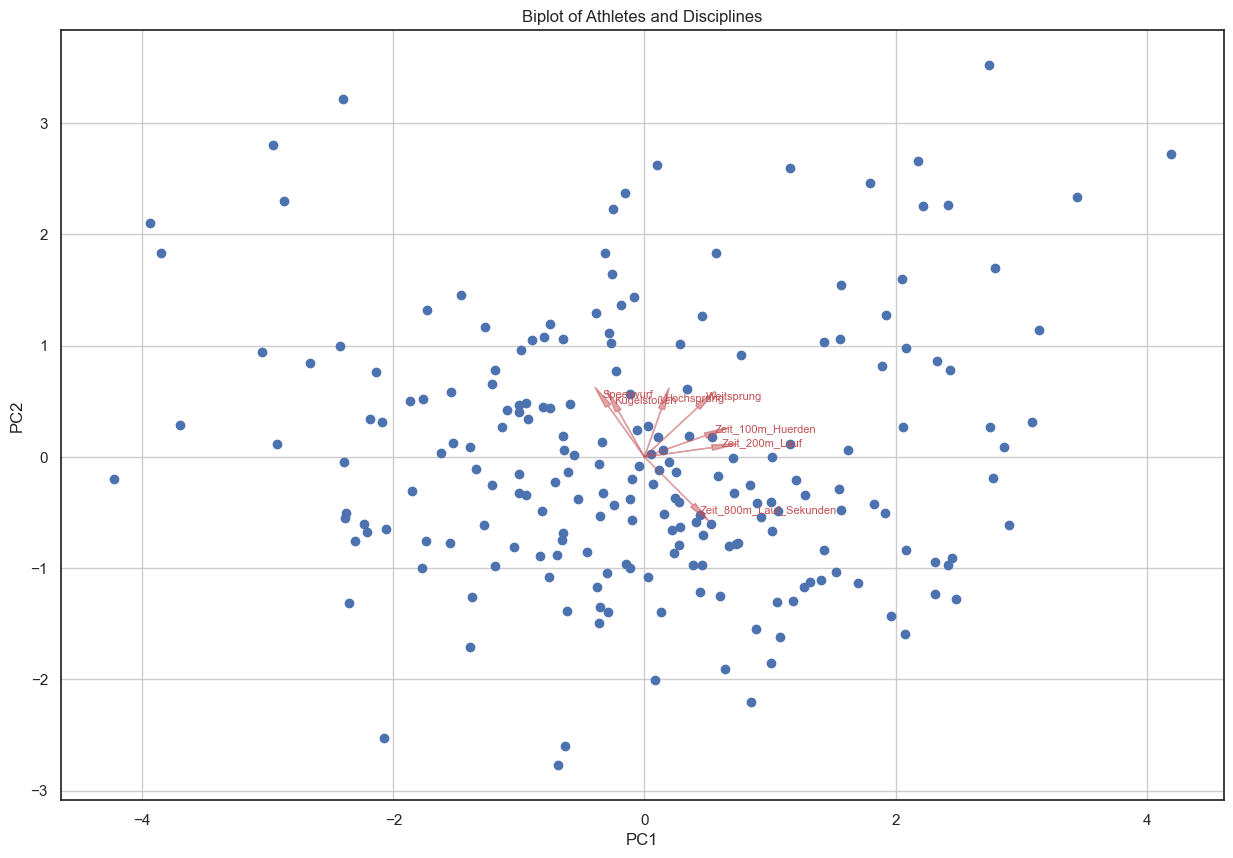

In [20]:
# Biplot Visualisierung
plt.figure(figsize=(15, 10))
scores = pca.transform(sieben_dis_numeric2_stand)
plt.scatter(scores[:, 0], scores[:, 1])

for i, var in enumerate(disziplinen):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5, head_width=0.05, head_length=0.2)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, var, color='r', fontsize=8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Athletes and Disciplines')
plt.grid(True)
plt.show()

# Speer und Kugel sind sich ähnlich
# Hoch- und Weitsprung sind sich ähnlich
# 100m_Huerde und 200m sind sich ähnlich
# 800m ist sehr anders als Speer und Kugel

#### 4 Anteil erklärter Varianz (PVE)

In [21]:
# Varianz jeder Hauptkomponente
pca_stand_var = pca.explained_variance_
pca_stand_var

array([2.40027679, 1.32209066, 1.05129873, 0.80734685, 0.66392   ,
       0.43076271, 0.35828485])

In [22]:
# Anteil erklärter Varianz je Hauptkomponente
pca_stand_pve = pca.explained_variance_ratio_
pca_stand_pve

array([0.34124018, 0.18795768, 0.14946   , 0.11477809, 0.09438752,
       0.06124025, 0.05093629])

Text(0.5, 1.0, 'Anteil erklärter Varianz je Hauptkomponente')

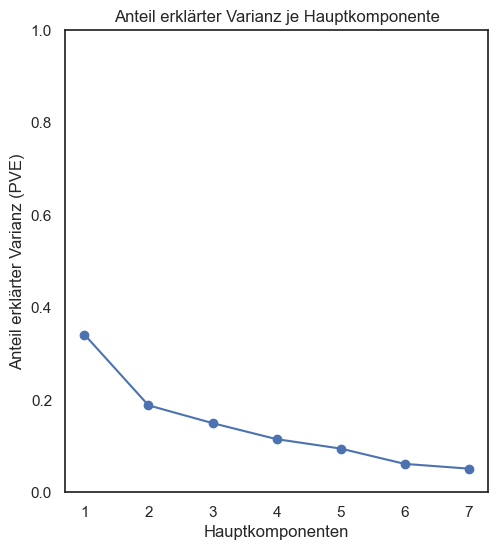

In [24]:
# Plot Anteil erklärter Varianz
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_stand_pve) + 1), pca_stand_pve, marker='o', linestyle='-')
plt.xlabel('Hauptkomponenten')
plt.ylabel('Anteil erklärter Varianz (PVE)')
plt.ylim(0, 1)
plt.title('Anteil erklärter Varianz je Hauptkomponente')

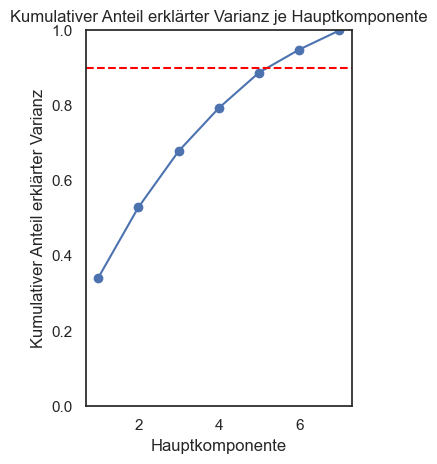

In [25]:
# Kumulativer Anteil erklärter Varianz
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_stand_pve) + 1), np.cumsum(pca_stand_pve), marker='o', linestyle='-')
plt.xlabel('Hauptkomponente')
plt.ylabel('Kumulativer Anteil erklärter Varianz')
plt.ylim(0, 1)
plt.title('Kumulativer Anteil erklärter Varianz je Hauptkomponente')
plt.axhline(y=0.9, color='red', linestyle='--')

plt.tight_layout()
plt.show()